# Library imports and dataset load

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import sys

sys.path.append('../')

from utils.mode import calculate_mode

In [2]:
data_df = pd.read_csv('../data/data_playlist.csv')

# First rows visualization

In [3]:
data_df.head()

,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,label
0,0.713,0.514,100125,0.521,0.816000,8,0.1120,-14.835,0,0.0444,119.879,4,0.143,1
1,0.192,0.714,207019,0.614,0.000000,4,0.2630,-6.935,1,0.0319,123.969,4,0.582,1
2,0.333,0.630,216200,0.455,0.000004,5,0.1270,-9.290,1,0.0292,139.931,4,0.199,1
3,0.601,0.810,136413,0.221,0.210000,5,0.1840,-11.005,1,0.0429,109.960,4,0.798,1
4,0.883,0.465,181440,0.459,0.000173,6,0.0692,-8.137,0,0.0351,90.807,4,0.288,1


# Five numbers summary

In [9]:
five_number_summary = data_df.describe().loc[['min', '25%', '50%', '75%', 'max']]

five_number_summary

,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,label
min,0.000001,0.10700,33840.00,0.00925,0.000000,0.0,0.02400,-29.60100,0.0,0.02340,55.74700,1.0,0.0332,0.0
25%,0.037150,0.48000,185490.25,0.42325,0.000000,1.0,0.09455,-10.17350,0.0,0.03590,98.99800,4.0,0.2970,0.0
50%,0.244500,0.60600,215108.50,0.63150,0.000010,5.0,0.12900,-7.27000,1.0,0.04875,120.10450,4.0,0.4830,1.0
75%,0.678500,0.71575,244236.75,0.80475,0.002245,8.0,0.26475,-5.09775,1.0,0.11300,138.07475,4.0,0.6845,1.0
max,0.994000,0.98600,675360.00,0.99500,0.967000,11.0,0.97900,-0.53300,1.0,0.72100,204.16200,5.0,0.9750,1.0


# Data types identification

In [4]:
data_df.dtypes

acousticness        float64
danceability        float64
duration              int64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
speechiness         float64
tempo               float64
time_signature        int64
valence             float64
label                 int64
dtype: object

In [5]:
categorical_columns = list(data_df.select_dtypes(include=['object']).columns)
numerical_columns = list(data_df.select_dtypes(include=['float64', 'int64']).columns)

print(f'Categorical columns: {categorical_columns}')
print(f'Numerical columns: {numerical_columns}')

Categorical columns: []
Numerical columns: ['acousticness', 'danceability', 'duration', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence', 'label']


| Variable           | Type               | Description                                                      |
|--------------------|--------------------|------------------------------------------------------------------|
| `acousticness`     | float64 (Continua) | Describes how acoustic a song is. The closer to 1.0, the most likely to be an acoustic one              |
| `danceability`     | float64 (Continua) | Describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, among others                   |
| `duration`         | int64 (Continua)   | Length of the track in milliseconds                              |
| `energy`           | float64 (Continua) | Represents a perceptual measure of intensity and activity. For example, energetic tracks may feel fast, loud and noisy                        |
| `instrumentalness` | float64 (Continua) | Represents the amount of vocals in the song. The more instrumental the song is, the closer to 1.0                        |
| `key`              | int64 (Categórica Ordinal) | Musical key of the track.  It uses integers to map to specific pitches using standard Pitch Class notation.                                         |
| `liveness`         | float64 (Continua) | Describes the probability that the song was recorded with a live audience                          |
| `loudness`         | float64 (Continua) | Overall loudness of the track in decibels                        |
| `mode`             | int64 (Categórica Binaria) | Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0                               |
| `speechiness`      | float64 (Continua) | Detects the presence of spoken words in the track                            |
| `tempo`            | float64 (Continua) | Tempo of the track in beats per minute (BPM)                     |
| `time_signature`   | int64 (Categórica Ordinal) | The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure)                      |
| `valence`          | float64 (Continua) | A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive                  |
| `label`            | int64 (Categórica Nominal) | Label or category of the track. If the song likes the user, it is labeled as 1, otherwise, it is labeled as 0.                     |

All variables listed are informative for a classification problem. It's important to note that even if some like `key`, `mode`, and `time_signature` are categorical (Binary and Ordinal), they are represented as numerical values. 

In [14]:
categorical_columns = ['key', 'mode', 'time_signature', 'label']
numerical_columns = [ x for x in numerical_columns if x not in categorical_columns ]

print(f'Categorical columns: {categorical_columns}')
print(f'Numerical columns: {numerical_columns}')

Categorical columns: ['key', 'mode', 'time_signature', 'label']
Numerical columns: ['acousticness', 'danceability', 'duration', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']


## Feature analysis

## Input variables

### Continuous numeric variables

In [15]:
numerical_columns_without_label = [col for col in numerical_columns if col != 'label']

summary_stats = data_df[numerical_columns_without_label].describe().T
summary_stats['median'] = data_df[numerical_columns_without_label].median()
summary_stats['variance'] = data_df[numerical_columns_without_label].var()

summary_stats = summary_stats.drop(columns=['min', '25%', '50%', '75%', 'max'])

summary_stats = summary_stats[['mean', 'median', 'std', 'variance']]

summary_stats

,mean,median,std,variance
acousticness,0.357394,0.24450,0.338405,1.145181e-01
danceability,0.596439,0.60600,0.172036,2.959653e-02
duration,220112.733333,215108.50000,65587.690483,4.301745e+09
energy,0.594188,0.63150,0.253301,6.416155e-02
instrumentalness,0.100245,0.00001,0.259921,6.755916e-02
liveness,0.203376,0.12900,0.177609,3.154482e-02
loudness,-8.509339,-7.27000,5.039488,2.539644e+01
speechiness,0.098966,0.04875,0.104715,1.096513e-02
tempo,120.405761,120.10450,28.378116,8.053175e+02
valence,0.497321,0.48300,0.239615,5.741530e-02


### Distribution analysis

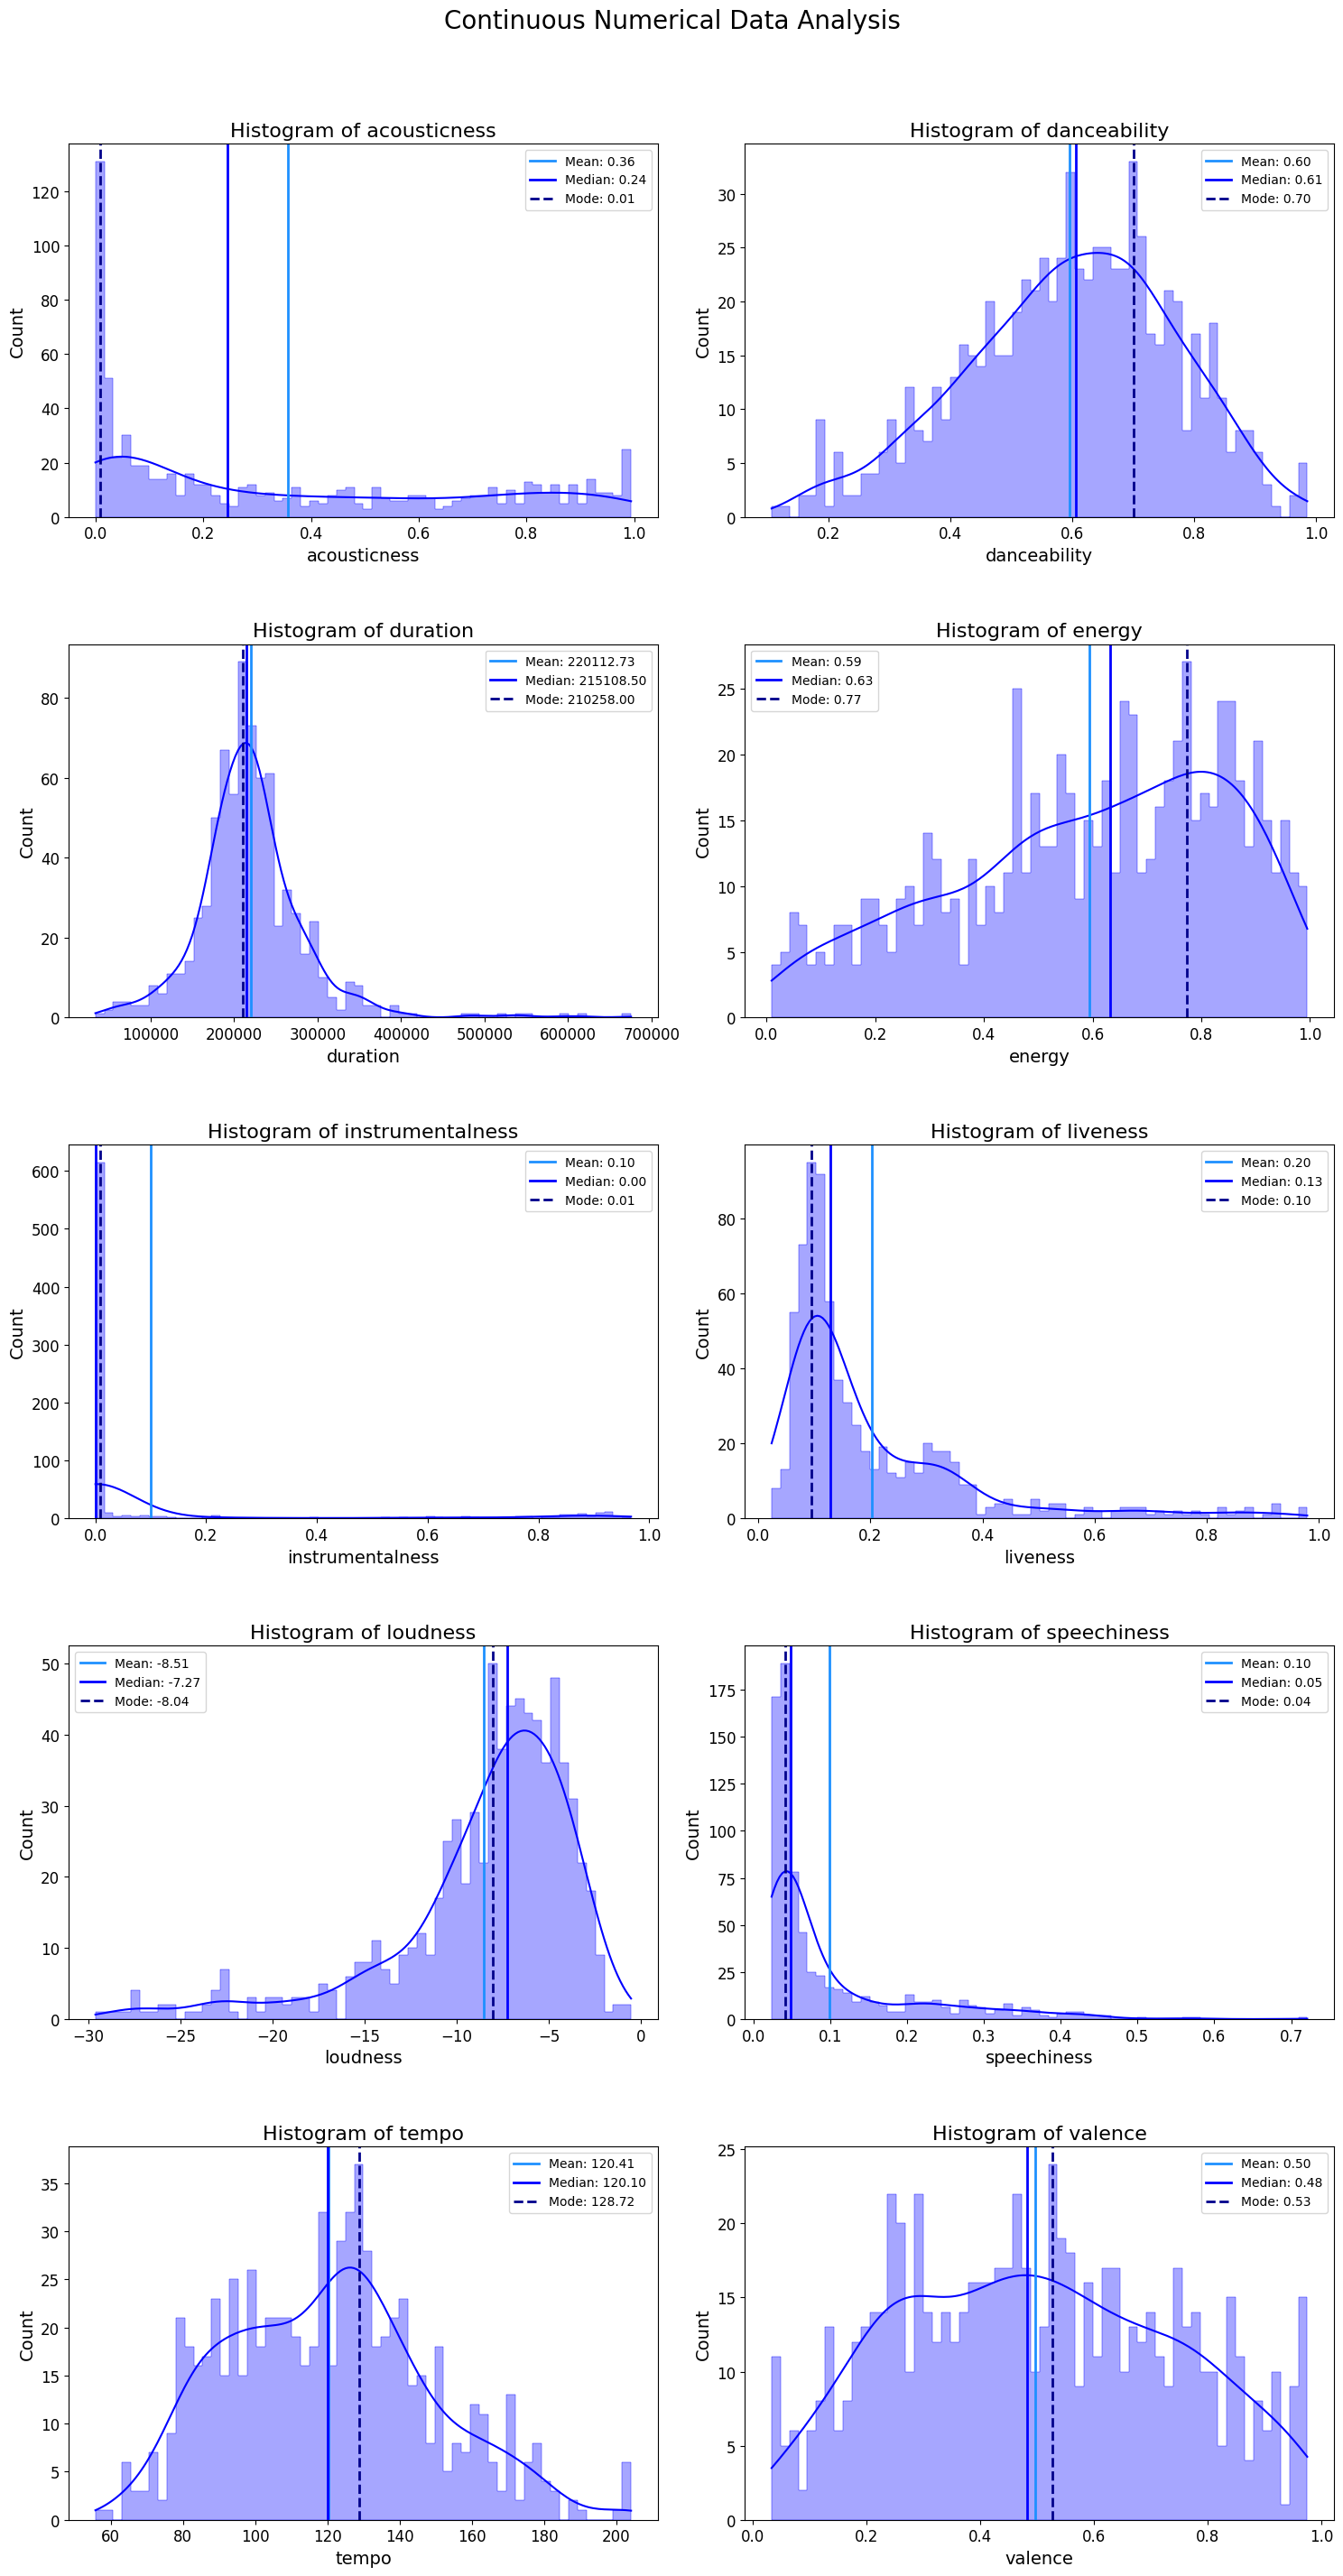

In [16]:
fig, axes = plt.subplots(5, 2, figsize=(15, 30))
fig.suptitle('Continuous Numerical Data Analysis', fontsize=20)

for ax, var in zip(axes.flatten(), numerical_columns):
    sns.histplot(data=data_df, x=var, kde=True, ax=ax, color='blue', element='step', bins=60, alpha=0.35, edgecolor='blue', linewidth=0.3)
    
    mean = data_df[var].mean()
    median = data_df[var].median()
    mode = calculate_mode(data_df[var])
    
    ax.axvline(mean, color='dodgerblue', linestyle='-', label=f'Mean: {mean:.2f}', linewidth=2)
    ax.axvline(median, color='blue', linestyle='-', label=f'Median: {median:.2f}', linewidth=2)
    ax.axvline(mode, color='darkblue', linestyle='--', label=f'Mode: {mode:.2f}', linewidth=2)
    
    ax.set_title(f'Histogram of {var}', fontsize=16)
    ax.set_xlabel(var, fontsize=14)
    ax.set_ylabel('Count', fontsize=14)
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    ax.legend(fontsize=10)

# Adjust layout to add more top separation
plt.tight_layout(rect=[0, 0.03, 1, 0.65])
plt.subplots_adjust(top=0.93)
plt.show()

### Conclusions about data distributions 

| Variable         | Mean          | Mode          | Playlist Insights                                                                                       |
|------------------|---------------|---------------|-----------------------------------------------------------------------------------------------|
| Acousticness     | 0.36          | 0.01          | Most tracks have low acousticness, indicating heavily produced music.                          |
| Danceability     | 0.60          | 0.70          | Tracks have good danceability, suitable for energetic  ambiance.                                |
| Duration         | 220112.73 ms  | 210258.00 ms  | Tracks are typically 3-4 minutes long, suitable for mainstream listening.                      |
| Energy           | 0.59          | 0.77          | High-energy tracks, suitable for workouts or parties.                                          |
| Instrumentalness | 0.10          | 0.01          | Mostly vocal tracks, with very few instrumental pieces.                                        |
| Liveness         | 0.20          | 0.10          | Predominantly studio recordings with little audience noise.                                    |
| Loudness         | -8.51 dB      | -8.04 dB      | Tracks are mastered to standard loudness levels for modern music.                              |
| Speechiness      | 0.10          | 0.04          | Predominantly features sung lyrics rather than spoken words or rap                             |
| Tempo            | 120.41 BPM    | 128.72 BPM    | Varied tempos with a central tendency around 120 BPM, typical for danceable tracks.            |
| Valence          | 0.50          | 0.53          | Balanced mix of happy and sad tracks, providing varied emotional tones.                        |


### Relation of numeric variables with the target variable

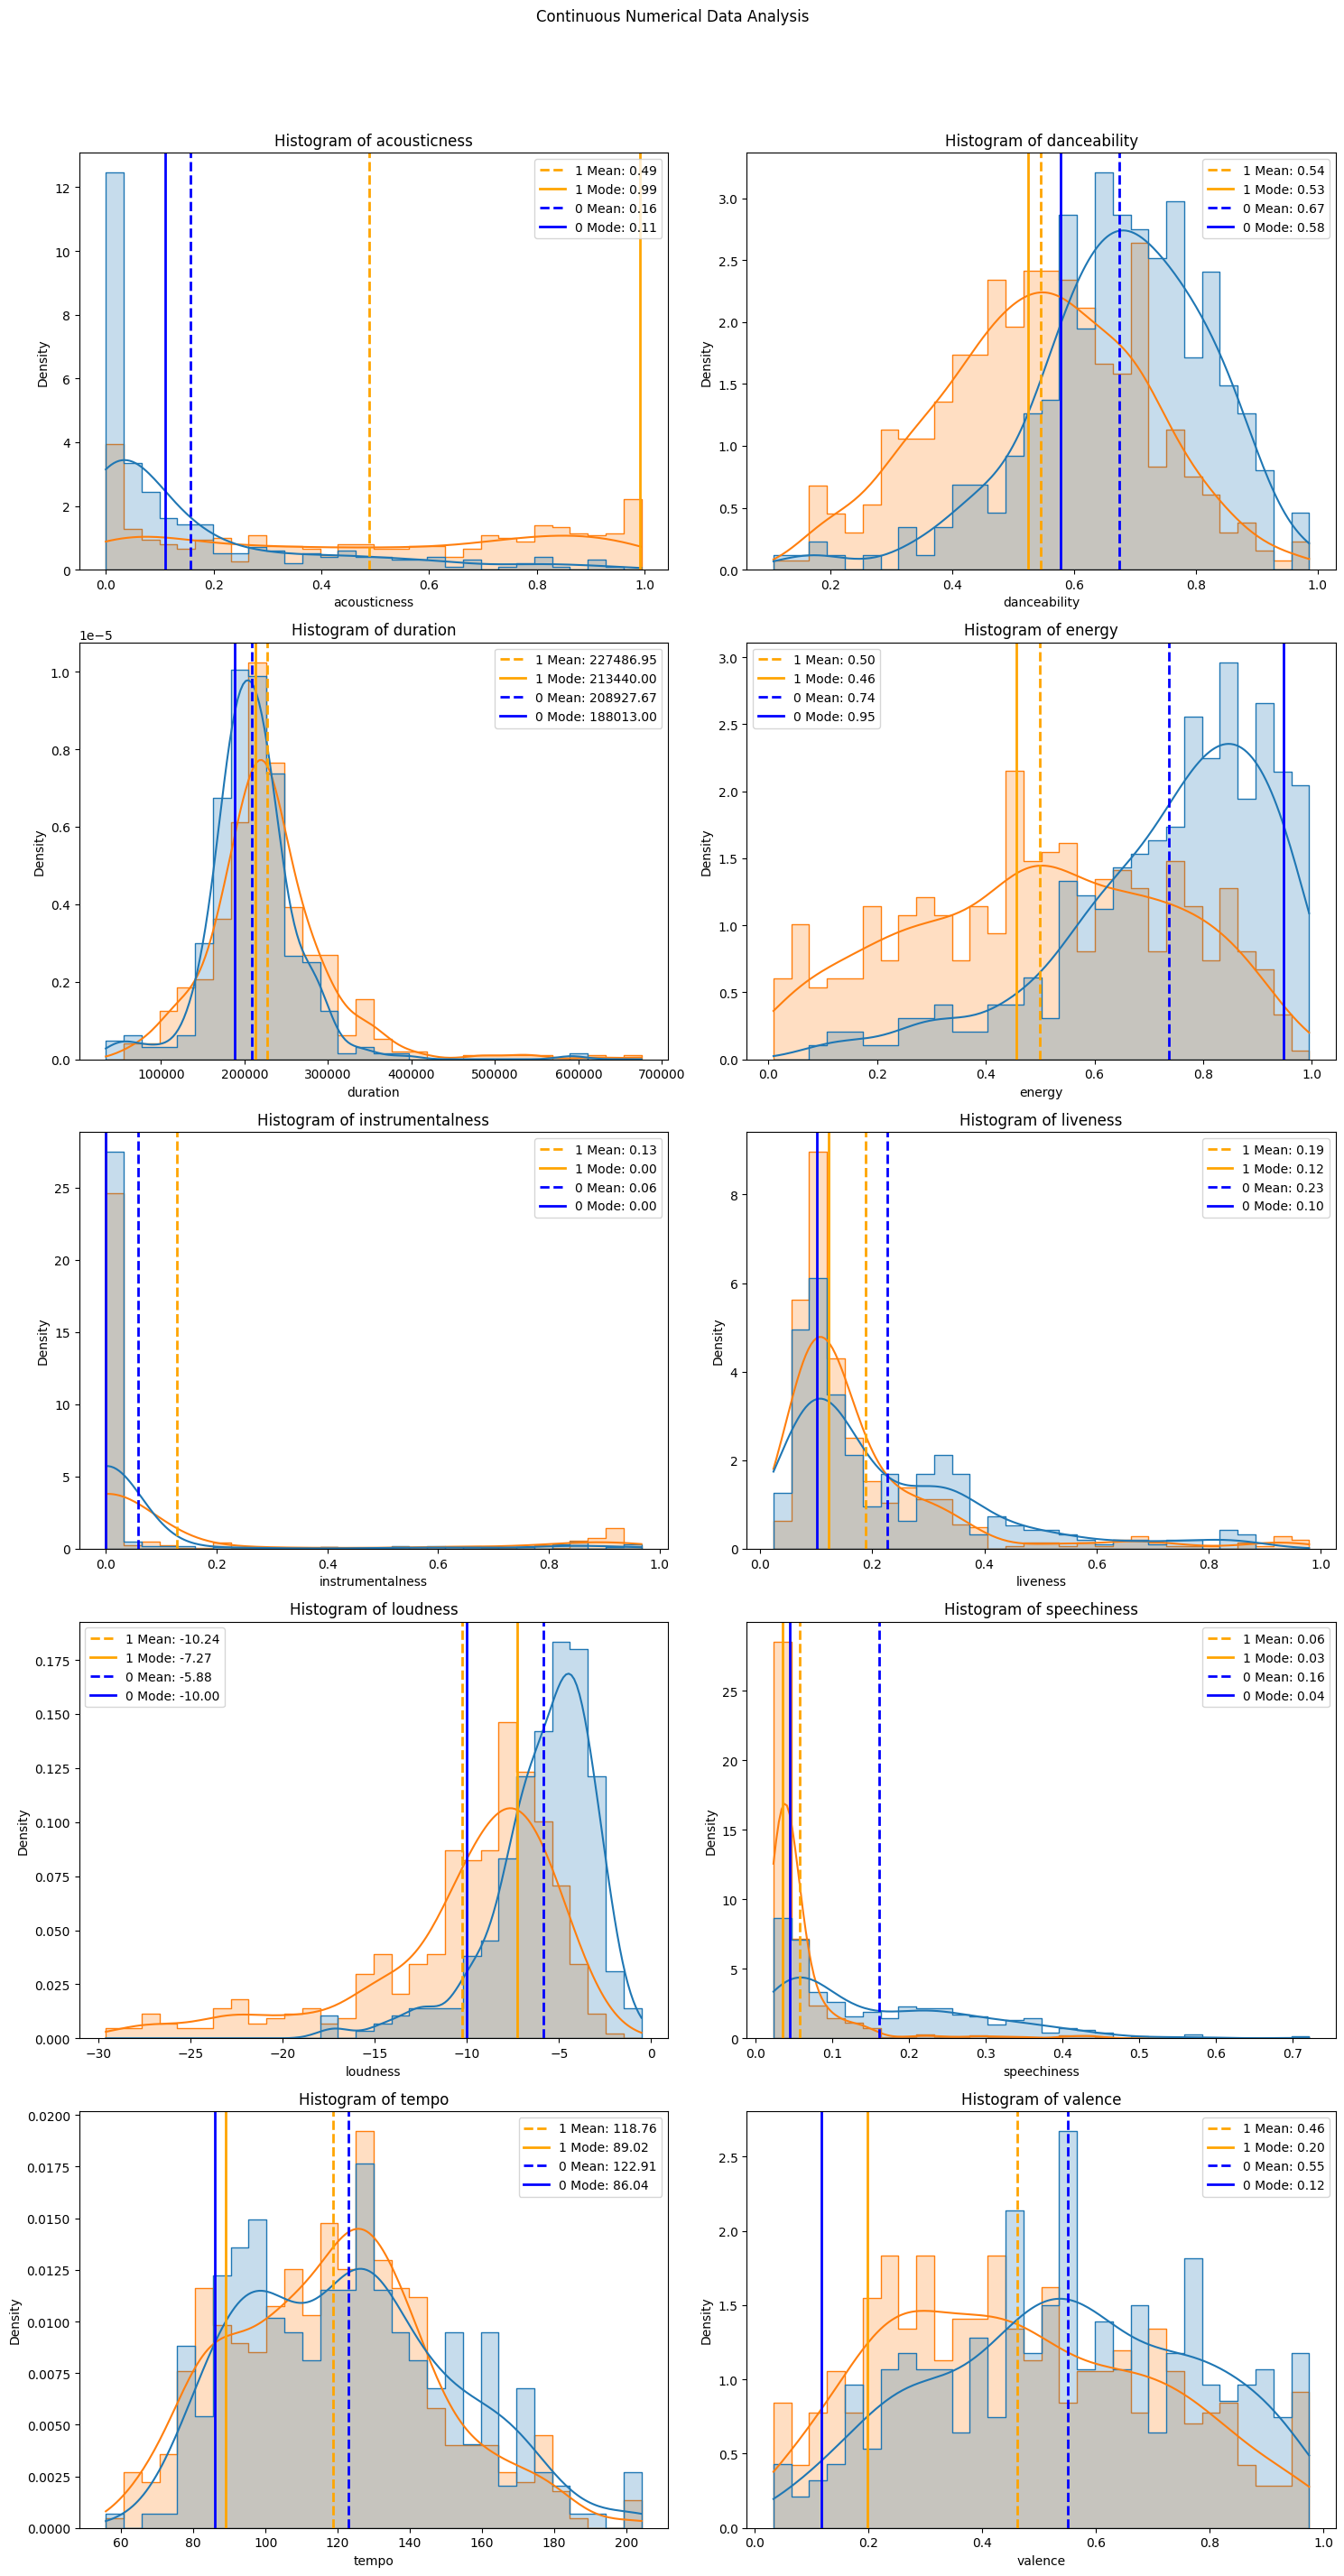

In [76]:
colors = { 0: 'blue', 1: 'orange' }

fig, axes = plt.subplots(5, 2, figsize=(15, 30))
fig.suptitle('Continuous Numerical Data Analysis')

for ax, var in zip(axes.flatten(), numerical_columns):
    sns.histplot(data=data_df, x=var, hue='label', kde=True, ax=ax, bins=30, element='step', stat="density", common_norm=False)
    
    for label in data_df['label'].unique():
        subset = data_df[data_df['label'] == label]
        mean = subset[var].mean()
        mode = subset[var].mode().values[0]
        
        color = colors[label]
        
        ax.axvline(mean, color=color, linestyle='--', label=f'{label} Mean: {mean:.2f}', linewidth=2)
        ax.axvline(mode, color=color, linestyle='-', label=f'{label} Mode: {mode:.2f}', linewidth=2)

    ax.set_title(f'Histogram of {var}')
    ax.legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Conclusions about the relation of numeric variables with the target variable

| Variable         | Liked Songs (Label=1)                    | Not Liked Songs (Label=0)             | Insight                                                                                       |
|------------------|------------------------------------------|---------------------------------------|-----------------------------------------------------------------------------------------------|
| Acousticness     | Mean: 0.49, Mode: 0.99                   | Mean: 0.16, Mode: 0.11                | Liked songs tend to have higher acousticness, indicating a preference for more acoustic tracks.|
| Danceability     | Mean: 0.54, Mode: 0.53                   | Mean: 0.67, Mode: 0.58                | Not liked songs tend to be more danceable.                                                     |
| Duration         | Mean: 227486.95 ms, Mode: 231440.00 ms   | Mean: 208927.67 ms, Mode: 188013.00 ms| Liked songs tend to be slightly longer, around 3.8 minutes.                                    |
| Energy           | Mean: 0.50, Mode: 0.46                   | Mean: 0.74, Mode: 0.95                | Not liked songs tend to have higher energy.                                                    |
| Instrumentalness | Mean: 0.13, Mode: 0.00                   | Mean: 0.06, Mode: 0.00                | Liked songs tend to be slightly more instrumental but generally have low values.               |
| Liveness         | Mean: 0.19, Mode: 0.12                   | Mean: 0.23, Mode: 0.10                | Not liked songs tend to have higher liveness, indicating a preference for studio recordings.   |
| Loudness         | Mean: -10.24 dB, Mode: -7.27 dB          | Mean: -5.88 dB, Mode: -10.00 dB       | Not liked songs tend to be louder.                                                             |
| Speechiness      | Mean: 0.06, Mode: 0.03                   | Mean: 0.16, Mode: 0.04                | Not liked songs tend to have higher speechiness, indicating a preference for less spoken word. |
| Tempo            | Mean: 118.76 BPM, Mode: 89.02 BPM        | Mean: 122.91 BPM, Mode: 86.04 BPM     | Not liked songs tend to have a higher tempo.                                                   |
| Valence          | Mean: 0.46, Mode: 0.20                   | Mean: 0.55, Mode: 0.12                | Not liked songs tend to have higher valence, indicating a preference for varied emotional tones.|


## Categorical features

### Categories distribution analysis

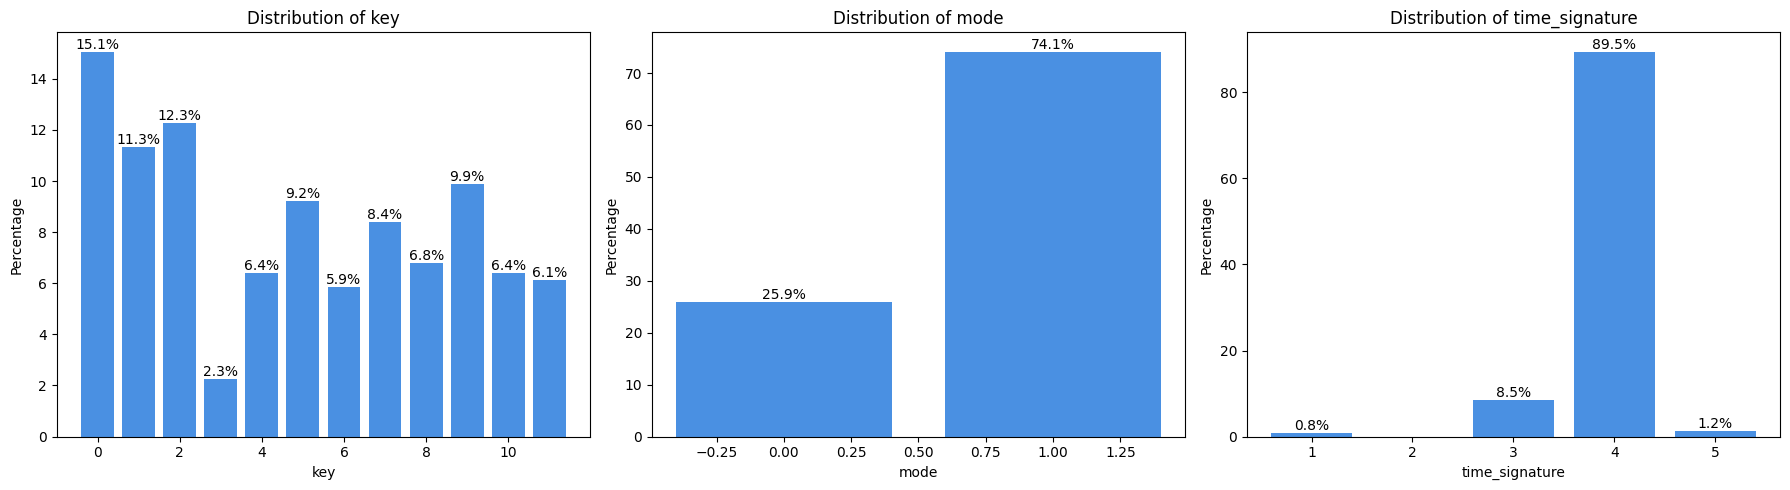

In [24]:
bins_color = '#4A90E2'

fig, axs = plt.subplots(1, 3, figsize=(18, 5))
plot_categorical_distribution_with_percentage(axs[0], data_df, 'key', bins_color)
plot_categorical_distribution_with_percentage(axs[1], data_df, 'mode', bins_color)
plot_categorical_distribution_with_percentage(axs[2], data_df, 'time_signature', bins_color)

plt.tight_layout()
plt.show()

| Variable         | Median        | Mean              | Cardinality | Playlist Insights                                                                                       |
|------------------|---------------|--------------------|-------------|---------------------------------------------------------------------------------------------------------|
| **Key**          | 5             | 5.19               | 12          | Most common key is '0' (C major/A minor), indicating a preference for these versatile keys in popular music.|
| **Mode**         | 1             | 0.74               | 2           | Predominantly major mode, reflecting an upbeat and positive mood. Minor mode tracks add some variety.|
| **Time Signature**| 4             | 3.80               | 4           | Mostly 4/4 time signature, standard in popular music, with some variation for rhythmic diversity.|

About the distributions:

1. **Key Distribution:**
   - Spread across 12 keys, showing diversity and a wide range of musical flavors.

2. **Mode Distribution:**
   - Higher prevalence of major mode aligns with popular music trends, while minor mode provides emotional contrast.

3. **Time Signature Distribution:**
   - Dominance of 4/4 time signature highlights its importance in making music accessible, with other signatures offering rhythmic variety.



### Relación de variables categóricas con la variable objetivo

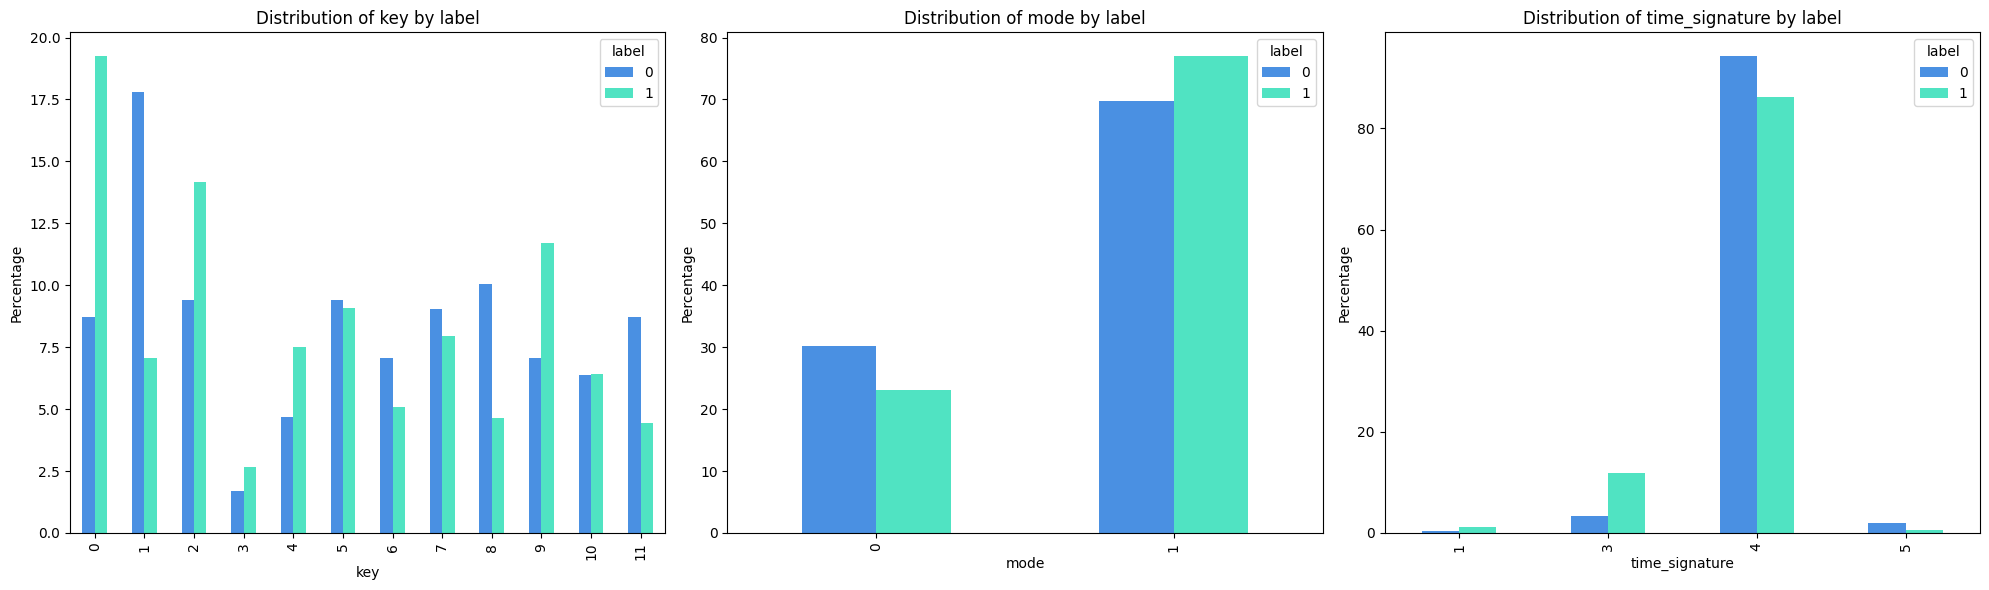

In [25]:
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

columns = ['key', 'mode', 'time_signature']

for ax, column in zip(axs, columns):
    crosstab = pd.crosstab(data_df[column], data_df['label'], normalize='columns') * 100
    crosstab.plot(kind='bar', ax=ax, color=['#4A90E2', '#50E3C2'])
    ax.set_title(f'Distribution of {column} by label')
    ax.set_xlabel(column)
    ax.set_ylabel('Percentage')
    ax.legend(title='label', loc='upper right')

plt.tight_layout()
plt.show()

| Variable         | Playlist Insights                                                                                       |
|------------------|---------------------------------------------------------------------------------------------------------|
| **Key**          | Both labels show a preference for key '0' (C major/A minor), but key distribution varies across labels, indicating diversity in key preferences based on the label. |
| **Mode**         | Major mode (1) is predominant in both labels, with a slightly higher proportion in Label 1, reflecting a generally upbeat mood across both labels. |
| **Time Signature**| 4/4 time signature is dominant in both labels, standard in popular music, with minor variations in other time signatures between labels. |


### Compound features

In the base dataset, there are no existing compound features. However, it is possible to create new features by combining the existing ones. For instance, we can create a new feature called `loudness_energy` by multiplying the `loudness` and `energy` features.

This new feature could help the model capture the interactions between loudness and energy in the tracks, potentially improving its predictive performance. However, to create effective compound features, it is necessary to perform further analysis to understand the correlations between existing features. Identifying strong correlations can help in designing new features that capture significant interactions and contribute to the model's accuracy.

## Target class analysis

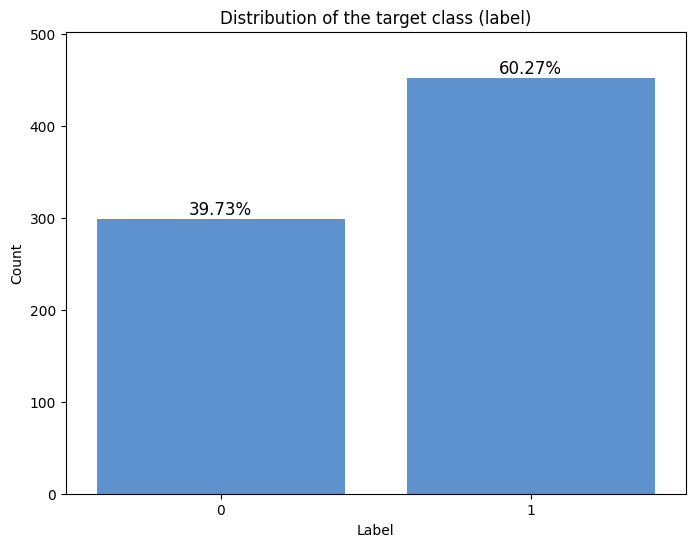

In [27]:
label_counts = data_df['label'].value_counts()
label_percentages = (label_counts / label_counts.sum()) * 100

plt.figure(figsize=(8, 6))

ax = sns.countplot(data=data_df, x='label', color='#4A90E2')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 5, '{:.2f}%'.format(height / len(data_df) * 100), ha='center', fontsize=12, color='black')

plt.title('Distribution of the target class (label)')
plt.xlabel('Label')
plt.ylabel('Count')
plt.ylim(0, label_counts.max() + 50) 

In the image above, we can see that the dataset is imbalanced, with one class representing approximately 60% of the data. This imbalance can affect the model's performance, especially for algorithms sensitive to class distribution.

### Target variable encoding

The target variable `label` is a categorical variable with two classes: `0` and `1`. We can say it is already encoded with the following mapping:

- `0`: Not Liked Songs
- `1`: Liked Songs